Percentage of missing values for each attribute:
Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64
Duplicate records found. Number of duplicate rows: 240
Duplicate records removed.


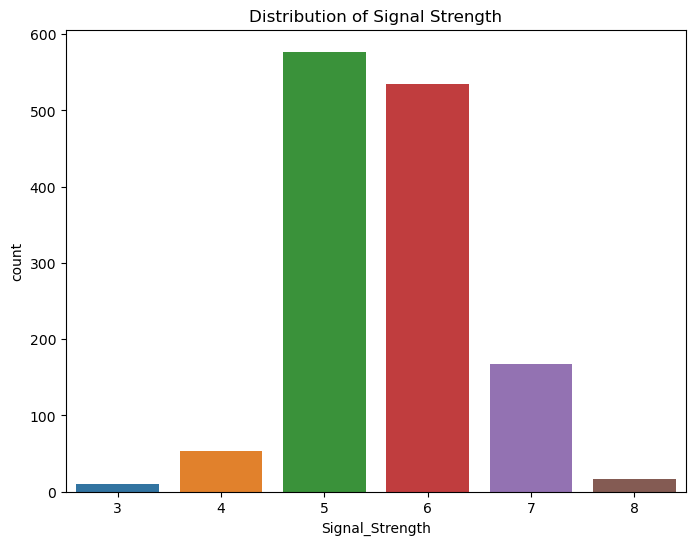

Shape of X_train: (951, 11)
Shape of X_test: (408, 11)
Shape of Y_train: (951,)
Shape of Y_test: (408,)


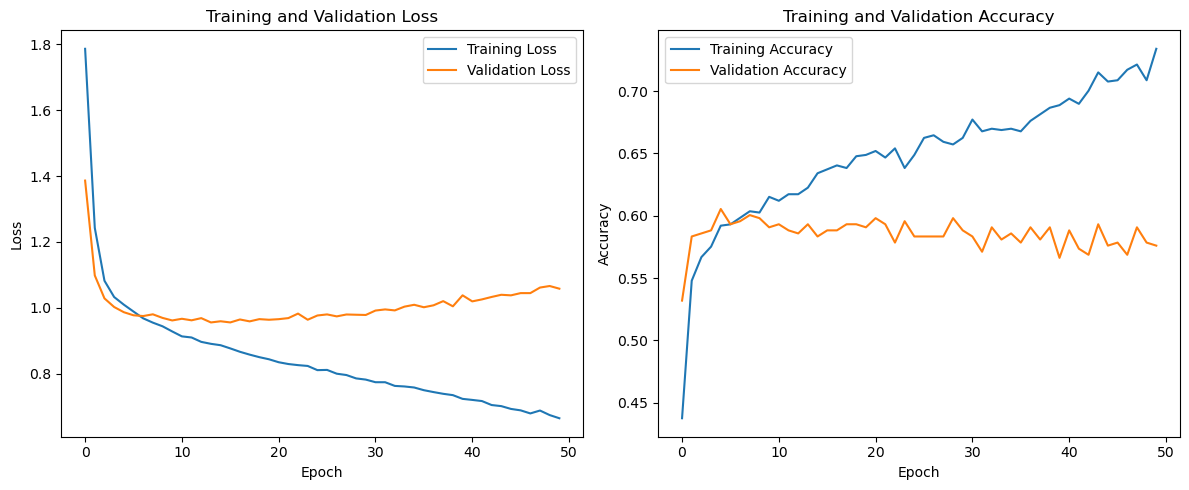

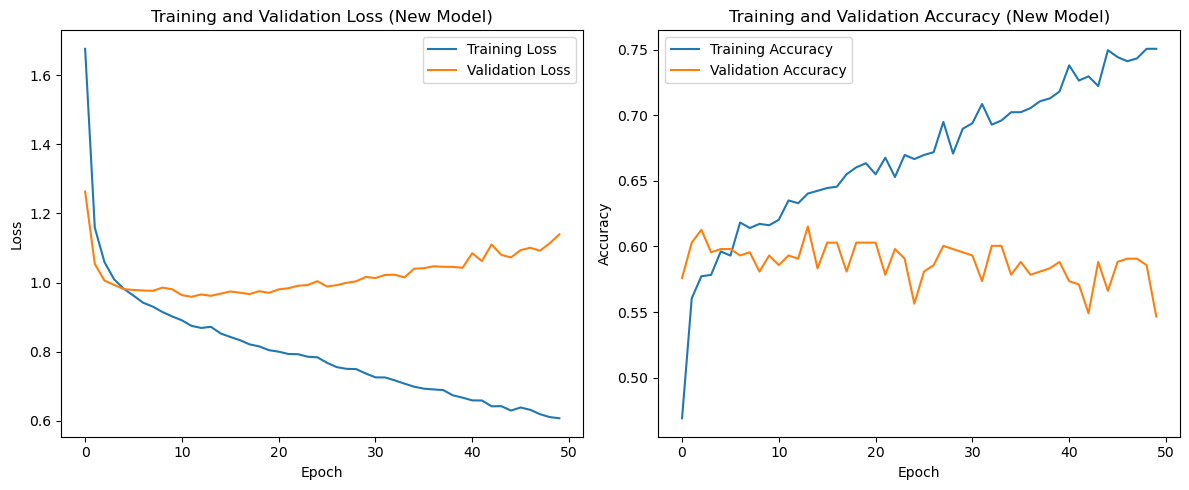

In [25]:
#PART A

# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1: Data Import and Understanding

# A. Read the ‘Signals.csv’ as DataFrame
df = pd.read_csv('Signal.csv')

# B. Check for missing values and print percentage for each attribute
missing_percentage = df.isnull().mean() * 100
print("Percentage of missing values for each attribute:")
print(missing_percentage)

# C. Check for presence of duplicate records in the dataset and impute with appropriate method
duplicate_rows = df[df.duplicated()]
if not duplicate_rows.empty:
    print("Duplicate records found. Number of duplicate rows:", duplicate_rows.shape[0])
    # Remove duplicate records
    df.drop_duplicates(inplace=True)
    print("Duplicate records removed.")
else:
    print("No duplicate records found.")

# D. Visualize distribution of the target variable
plt.figure(figsize=(8, 6))
plt.title('Distribution of Signal Strength')
plt.xlabel('Signal Strength')
plt.ylabel('Count')
sns.countplot(x='Signal_Strength', data=df)
plt.show()


# 2: Data Preprocessing

# A. Split the data into X & Y
X = df.drop(columns=['Signal_Strength'])
Y = df['Signal_Strength']

# B. Split the data into train & test with 70:30 proportion
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# C. Print shape of all the 4 variables and verify if train and test data is in sync
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

# D. Normalize the train and test data with appropriate method
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# E. Transform Labels into format acceptable by Neural Network
Y_train_categorical = tf.keras.utils.to_categorical(Y_train)
Y_test_categorical = tf.keras.utils.to_categorical(Y_test)

# 3: Model Training & Evaluation using Neural Network

# A. Design a Neural Network to train a classifier
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(9, activation='softmax')
])

# B. Train the classifier using previously designed Architecture
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, Y_train_categorical, epochs=50, batch_size=32, validation_data=(X_test_scaled, Y_test_categorical), verbose=0)

# C. Plot 2 separate visuals
plt.figure(figsize=(12, 5))

# i. Training Loss and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# ii. Training Accuracy and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# D. Design new architecture/update existing architecture in attempt to improve the performance of the model
model_new = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(9, activation='softmax')
])

#  Train the classifier using the new architecture
model_new.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_new = model_new.fit(X_train_scaled, Y_train_categorical, epochs=50, batch_size=32, validation_data=(X_test_scaled, Y_test_categorical), verbose=0)

# E. Plot visuals and share insights about the difference observed in both the models
plt.figure(figsize=(12, 5))

# i. Training Loss and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(history_new.history['loss'], label='Training Loss')
plt.plot(history_new.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (New Model)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# ii. Training Accuracy and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_new.history['accuracy'], label='Training Accuracy')
plt.plot(history_new.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (New Model)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
#1. Data import and Understanding
#E. Share insights from the initial data analysis (at least 2). [2 Marks]
###Insights from Initial Data Analysis
Insight 1: Impact of Missing Values
From step B, where we check for missing values and print the percentage for each attribute, a crucial insight would be understanding the extent to which missing data could affect our analysis and model training.
If certain attributes have a high percentage of missing values, it could indicate problems with data collection or that those parameters are harder to measure. This insight could lead to considering imputation techniques or even the removal of the attribute if too many values are missing.
Conversely, a low percentage or absence of missing values indicates good data quality and reliability, suggesting that most of the collected data is usable for analysis and modeling.
This step underscores the importance of addressing missing data appropriately to avoid biased or inaccurate models.

Insight 2: Importance of Duplicate Removal
The process of checking for and removing duplicate records, as mentioned in step C, provides valuable insight into data collection and integrity.
The presence of duplicates could indicate repetitive data collection or entry errors, which, if left unaddressed, could skew the analysis and model training, leading to overfitting.
Removing duplicates ensures that each data point is unique, contributing to the diversity of the dataset. This step enhances the model's ability to generalize by learning from a more accurate representation of the data's variability.###

In [4]:
#PART - B
#1. Data Import and Exploration

#A. Read the .h5 file and assign to a variable
#B. Print all the keys from the .h5 file.
import h5py
hf = h5py.File('C:\Users\moham\Downloads\New folder\Autonomous_Vehicles_SVHN_single_grey1.h5','r')


Total classes: 10


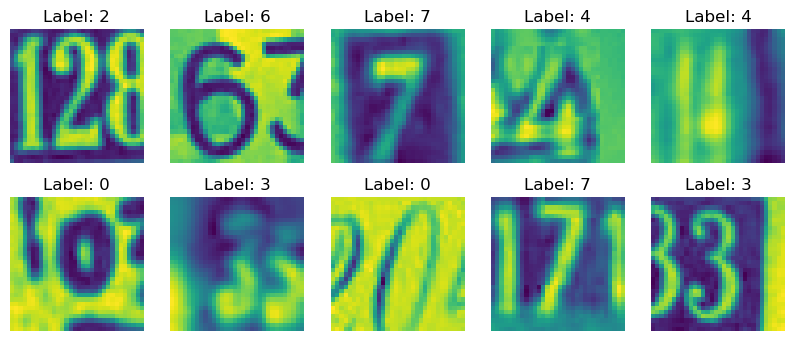

Epoch 1/10
1050/1050 [==============================] - 11s 10ms/step - loss: 1.0946 - accuracy: 0.6531 - val_loss: 0.6702 - val_accuracy: 0.8098
Epoch 2/10
1050/1050 [==============================] - 10s 9ms/step - loss: 0.5790 - accuracy: 0.8365 - val_loss: 0.5605 - val_accuracy: 0.8495
Epoch 3/10
1050/1050 [==============================] - 10s 9ms/step - loss: 0.5041 - accuracy: 0.8587 - val_loss: 0.5230 - val_accuracy: 0.8601
Epoch 4/10
1050/1050 [==============================] - 10s 9ms/step - loss: 0.4555 - accuracy: 0.8727 - val_loss: 0.4817 - val_accuracy: 0.8712
Epoch 5/10
1050/1050 [==============================] - 10s 9ms/step - loss: 0.4156 - accuracy: 0.8834 - val_loss: 0.4586 - val_accuracy: 0.8774
Epoch 6/10
1050/1050 [==============================] - 10s 9ms/step - loss: 0.3829 - accuracy: 0.8896 - val_loss: 0.4529 - val_accuracy: 0.8757
Epoch 7/10
1050/1050 [==============================] - 10s 10ms/step - loss: 0.3504 - accuracy: 0.8982 - val_loss: 0.4558 - val_

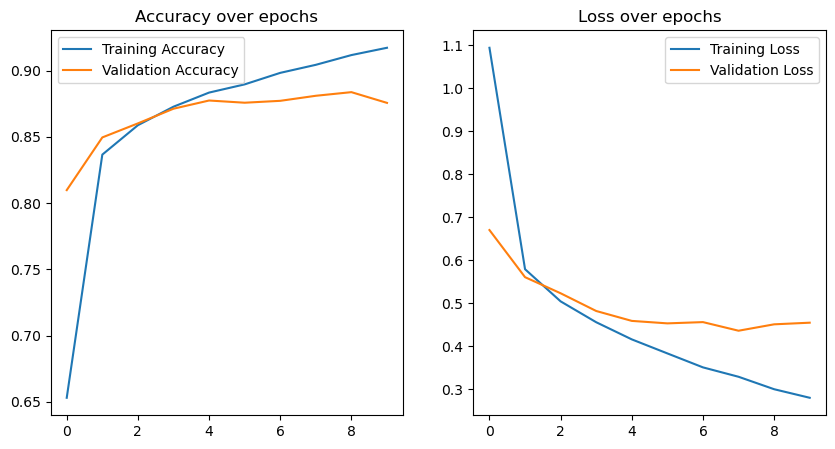

In [24]:

import h5py
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

hf = h5py.File(r'C:\Users\moham\Downloads\New folder\Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')


#C. Split the data into X_train, X_test, Y_train, Y_test
def load_h5_dataset(file_path):
    with h5py.File(file_path, 'r') as h5_file:
        X_train = h5_file['X_train'][:]
        Y_train = h5_file['y_train'][:]
        X_test = h5_file['X_test'][:]
        Y_test = h5_file['y_test'][:]
 return X_train, Y_train, X_test, Y_test

#2. Data Visualisation and preprocessing
#A. Print shape of all the 4 data splits into x, y, train, test to verify if x & y are in sync.
#C. Reshape all the images with appropriate shape and update the data in the same variable.
#D. Normalize the images, i.e., normalize the pixel values
# Preprocessing
def preprocess_data(X_train, Y_train, X_test, Y_test):

    X_train = X_train.astype('float32') / 255.
    X_test = X_test.astype('float32') / 255.
    

    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

#E. Transform Labels into a format acceptable by Neural Network
    num_classes = len(np.unique(Y_train))
    Y_train = to_categorical(Y_train, num_classes)
    Y_test = to_categorical(Y_test, num_classes)

    return X_train, Y_train, X_test, Y_test, num_classes
# 3: Model Training & Evaluation using Neural Network
#A. Design a Neural Network to train a classifier
def build_model(num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),  # Adjusted for 1 channel
        MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])


    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model
#2. Data Visualisation and preprocessing
#B. Visualise first 10 images in train data and print its corresponding labels

def visualize_data(X_train, Y_train):
    plt.figure(figsize=(10, 4))
    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.imshow(X_train[i])
        plt.title("Label: %s" % np.argmax(Y_train[i]))
        plt.axis('off')
    plt.show()
#2. Data Visualisation and preprocessing
#F. Print the total Number of classes in the Dataset
if __name__ == "__main__":
    # Corrected file path in the main script with a raw string
    file_path = r"C:\Users\moham\Downloads\New folder\Autonomous_Vehicles_SVHN_single_grey1.h5"
    X_train, Y_train, X_test, Y_test = load_h5_dataset(file_path)

    X_train, Y_train, X_test, Y_test, num_classes = preprocess_data(X_train, Y_train, X_test, Y_test)
    print("Total classes:", num_classes)

    visualize_data(X_train, Y_train)

    model = build_model(num_classes)
    
#3. Model Training & Evaluation using Neural Network    
#B. Train the classifier using previously designed Architecture (Use best suitable parameters).

    history = model.fit(X_train, Y_train, epochs=10, validation_split=0.2)
    
#C. Evaluate performance of the model with appropriate metrics

    test_loss, test_acc = model.evaluate(X_test, Y_test)
    print("Test accuracy:", test_acc)

#D. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over epochs')
    plt.legend()

    plt.show()
